In [1]:
import pandas as pd 
df=pd.read_csv(r'Fifa.csv', encoding='latin-1', index_col=0)
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31.0,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94.0,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226.5M
1,20801,Cristiano Ronaldo,33.0,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94.0,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127.1M
2,190871,Neymar Jr,26.0,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92.0,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228.1M
3,193080,De Gea,27.0,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91.0,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138.6M
4,192985,K. De Bruyne,27.0,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91.0,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196.4M


In [2]:
df.isnull().sum()

ID                   0
Name                 0
Age                  1
Photo                0
Nationality          0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 88, dtype: int64

In [3]:
df.shape

(18207, 88)

In [4]:
df.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiv

In [5]:
df['ShortPassing']=df['ShortPassing'].fillna(df['ShortPassing'].mode()[0]) #[0] is used to access the first (most frequent) value from the mode calculation

In [6]:
df['ShortPassing'].value_counts()

ShortPassing
64.0    924
65.0    789
62.0    763
63.0    742
68.0    735
       ... 
93.0      2
92.0      2
7.0       2
91.0      1
8.0       1
Name: count, Length: 85, dtype: int64

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
for col in df.columns:
    df[col].fillna(df[col].mode()[0],inplace=True)

In [9]:
df.dtypes

ID                  int64
Name               object
Age               float64
Photo              object
Nationality        object
                   ...   
GKHandling        float64
GKKicking         float64
GKPositioning     float64
GKReflexes        float64
Release Clause     object
Length: 88, dtype: object

In [10]:
df.isnull().sum().sum()

0

What is the distribution of preferred root?

In [11]:
df['Preferred Foot'].value_counts()

Preferred Foot
Right    13996
Left      4211
Name: count, dtype: int64

In [12]:
import matplotlib.pyplot as plt
labels=df['Preferred Foot'].value_counts().index
labels

Index(['Right', 'Left'], dtype='object', name='Preferred Foot')

In [13]:
sizes=df['Preferred Foot'].value_counts().values
sizes

array([13996,  4211], dtype=int64)

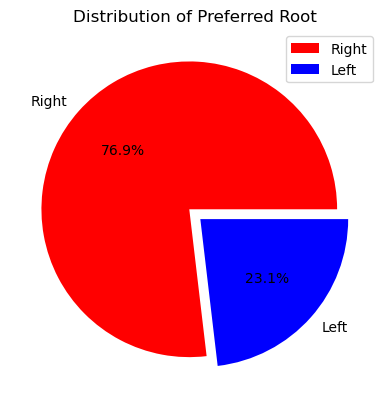

In [14]:
plt.pie(sizes, labels=labels, autopct='%0.1f%%', colors=['red','blue'], explode=[0.05,0.05])
plt.legend()
plt.title("Distribution of Preferred Root")
plt.show()

What is the distribution of Weak Foot?

In [15]:
df['Weak Foot'].value_counts()

Weak Foot
3.0    11397
2.0     3761
4.0     2662
5.0      229
1.0      158
Name: count, dtype: int64

In [16]:
labels=df['Weak Foot'].value_counts().index
labels

Index([3.0, 2.0, 4.0, 5.0, 1.0], dtype='float64', name='Weak Foot')

In [17]:
sizes=df['Weak Foot'].value_counts().values
sizes

array([11397,  3761,  2662,   229,   158], dtype=int64)

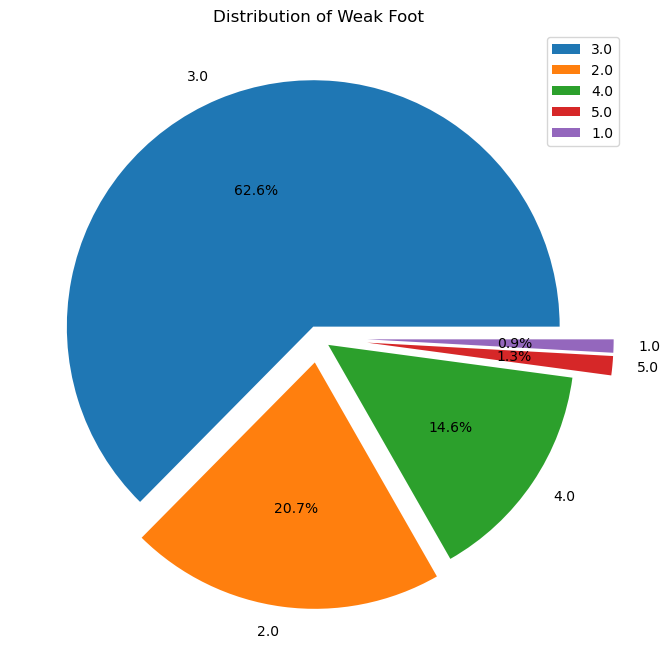

In [18]:
plt.rcParams['figure.figsize']=(28,8)
plt.pie(sizes, labels=labels, autopct='%0.1f%%', explode=[0.05,0.1,0.05,0.2,0.2])
plt.legend()
plt.title("Distribution of Weak Foot")
plt.show()

How can we visualize the age distribution of players

In [19]:
df.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiv

In [20]:
df['Age'].dtypes

dtype('float64')

In [21]:
df['Age'].value_counts

<bound method IndexOpsMixin.value_counts of 0        31.0
1        33.0
2        26.0
3        27.0
4        27.0
         ... 
18202    19.0
18203    19.0
18204    16.0
18205    17.0
18206    16.0
Name: Age, Length: 18207, dtype: float64>

In [22]:
x=df['Age'].value_counts().sort_index()
x

Age
16.0      42
17.0     289
18.0     732
19.0    1024
20.0    1240
21.0    1424
22.0    1340
23.0    1332
24.0    1358
25.0    1319
26.0    1387
27.0    1162
28.0    1100
29.0     959
30.0     917
31.0     707
32.0     574
33.0     408
34.0     404
35.0     196
36.0     127
37.0      82
38.0      37
39.0      25
40.0      13
41.0       5
42.0       1
44.0       2
45.0       1
Name: count, dtype: int64

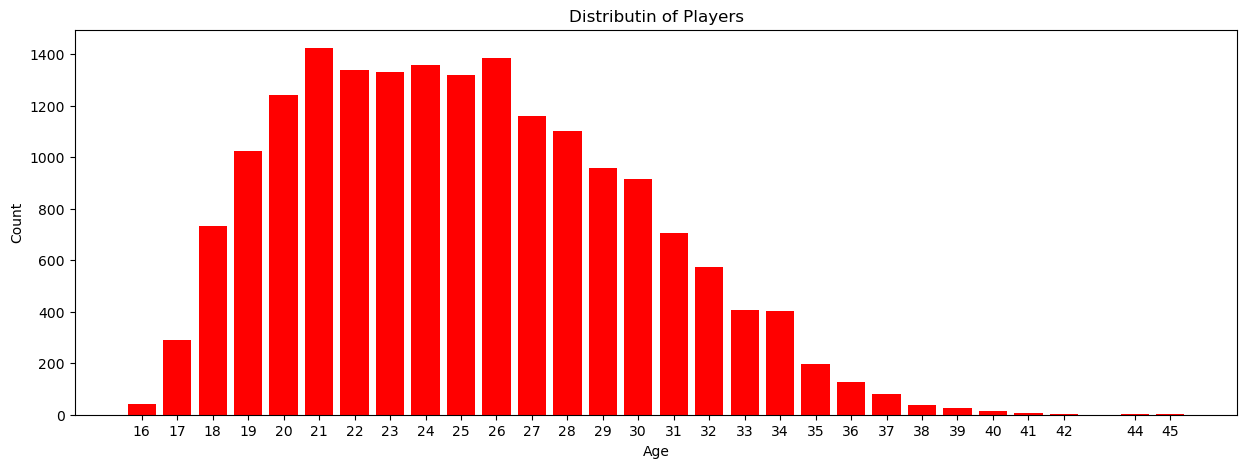

In [23]:
plt.rcParams['figure.figsize']=(15,5)
plt.bar(x.index,x.values, color='red')
plt.xticks(x.index)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distributin of Players')
plt.show()

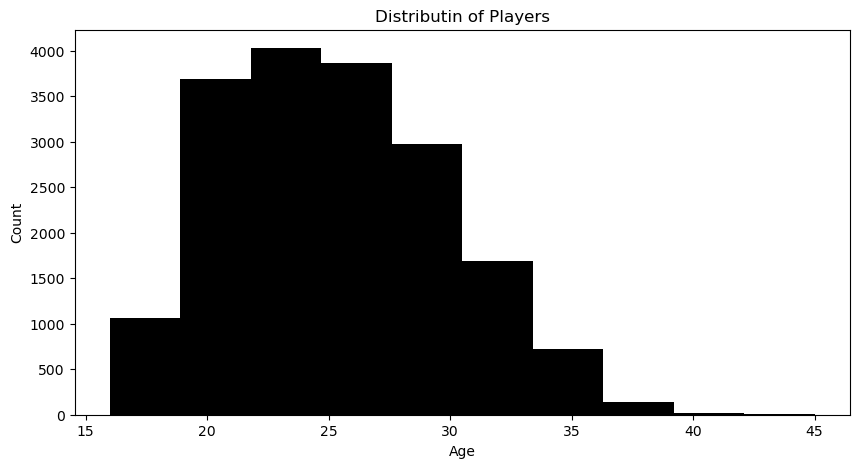

In [24]:
plt.rcParams['figure.figsize']=(10,5)
plt.hist(df['Age'], bins=10, color='black')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distributin of Players')
plt.show()

How can we track (top 10) international reputation of players on the basis of name. 

In [25]:
df.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiv

In [26]:
x=df.groupby('Name')['International Reputation'].max().sort_values(ascending=False).head(10)
x

Name
L. Messi             5.0
L. Suárez            5.0
M. Neuer             5.0
Cristiano Ronaldo    5.0
Z. Ibrahimovi?       5.0
Neymar Jr            5.0
M. Balotelli         4.0
B. Schweinsteiger    4.0
M. Hummels           4.0
G. Higuaín           4.0
Name: International Reputation, dtype: float64

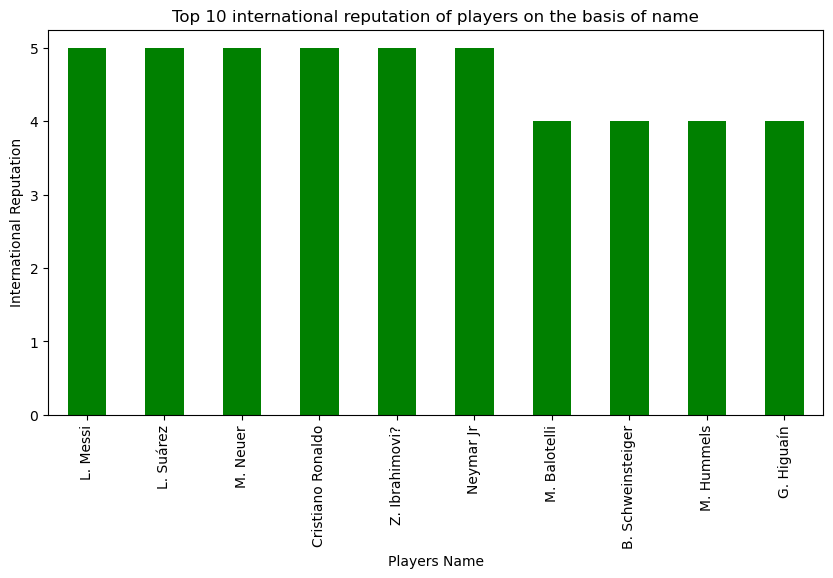

In [27]:
plt.rcParams['figure.figsize']=(10,5)
x.plot(kind='bar', color='green')
plt.xlabel('Players Name')
plt.ylabel('International Reputation')
plt.title('Top 10 international reputation of players on the basis of name')
plt.show()

What is the international reputation of left and right footed players, print it with their count?

In [28]:
y=df.groupby(['Preferred Foot','International Reputation'])['International Reputation'].count().unstack()
y

International Reputation,1.0,2.0,3.0,4.0,5.0
Preferred Foot,,,,,
Left,3839,290,66,15,1
Right,12741,971,243,36,5


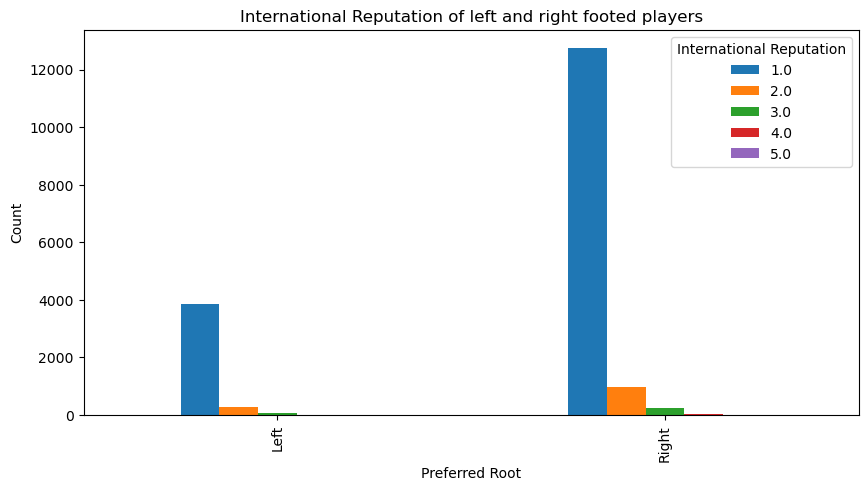

In [29]:
plt.rcParams['figure.figsize']=(10,5)
y.plot(kind='bar')
plt.xlabel('Preferred Root')
plt.ylabel('Count')
plt.title('International Reputation of left and right footed players')
plt.show()

How can we visualize work rate of players segregated by preferred root?

In [30]:
z=df.groupby(['Preferred Foot', 'Work Rate'])['Work Rate'].count().unstack()
z

Work Rate,High/ High,High/ Low,High/ Medium,Low/ High,Low/ Low,Low/ Medium,Medium/ High,Medium/ Low,Medium/ Medium
Preferred Foot,,,,,,,,,
Left,220,199,949,79,4,90,323,193,2154
Right,795,500,2224,360,30,359,1367,657,7704


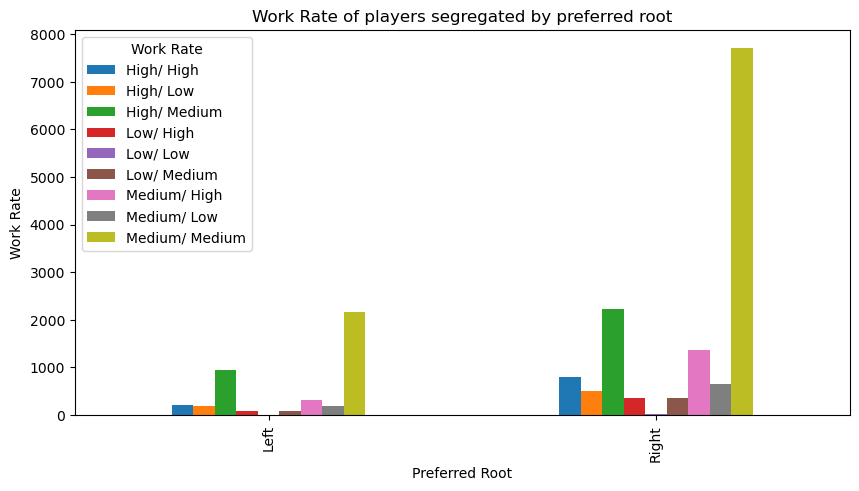

In [31]:
z.plot(kind='bar')
plt.xlabel('Preferred Root')
plt.ylabel('Work Rate')
plt.title('Work Rate of players segregated by preferred root')
plt.show()

Text(0.5, 0, 'Preferred Foot')

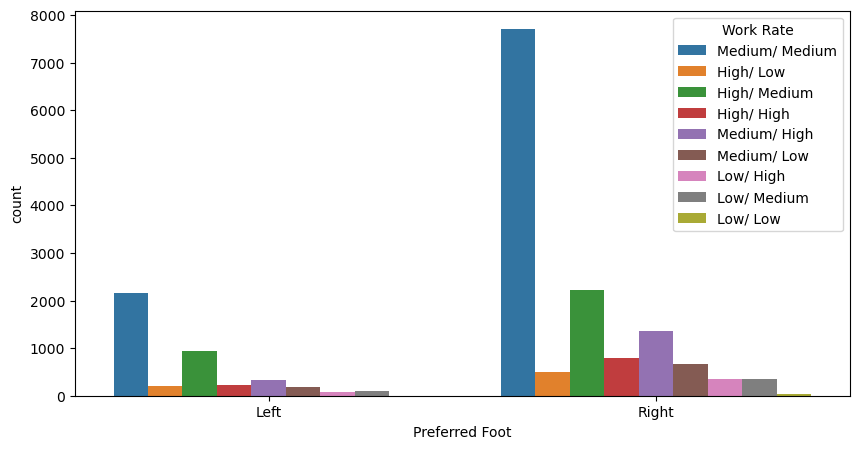

In [32]:
import seaborn as sns
sns.countplot(data=df,x='Preferred Foot', hue='Work Rate')
plt.xlabel('Preferred Foot')

Number of players at different positions 

In [33]:
b=df['Position'].value_counts()
b

Position
ST     2212
GK     2025
CB     1778
CM     1394
LB     1322
RB     1291
RM     1124
LM     1095
CAM     958
CDM     948
RCB     662
LCB     648
LCM     395
RCM     391
LW      381
RW      370
RDM     248
LDM     243
LS      207
RS      203
RWB      87
LWB      78
CF       74
LAM      21
RAM      21
RF       16
LF       15
Name: count, dtype: int64

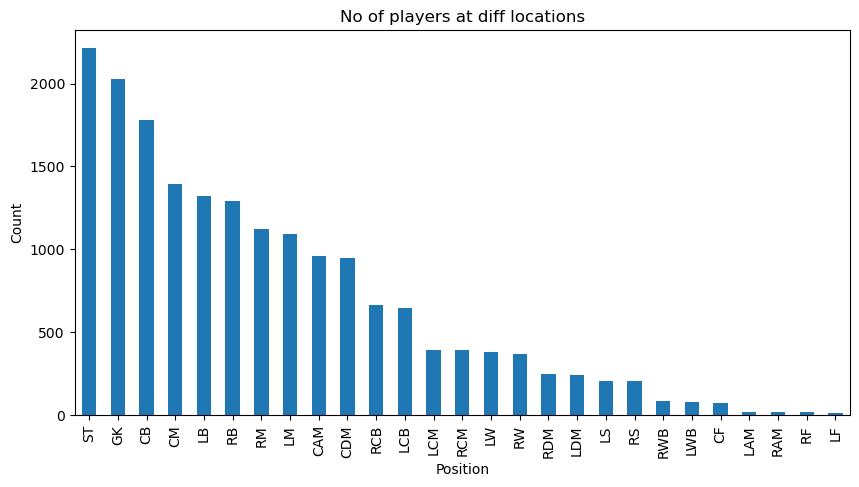

In [34]:
b.plot(kind='bar')
plt.xlabel('Position')
plt.ylabel('Count')
plt.title('No of players at diff locations')
plt.show()

Age Distribution from top countries

In [35]:
c=df['Nationality'].value_counts().head(10)
c

Nationality
England        1662
Germany        1198
Spain          1072
Argentina       937
France          914
Brazil          827
Italy           702
Colombia        618
Japan           478
Netherlands     453
Name: count, dtype: int64

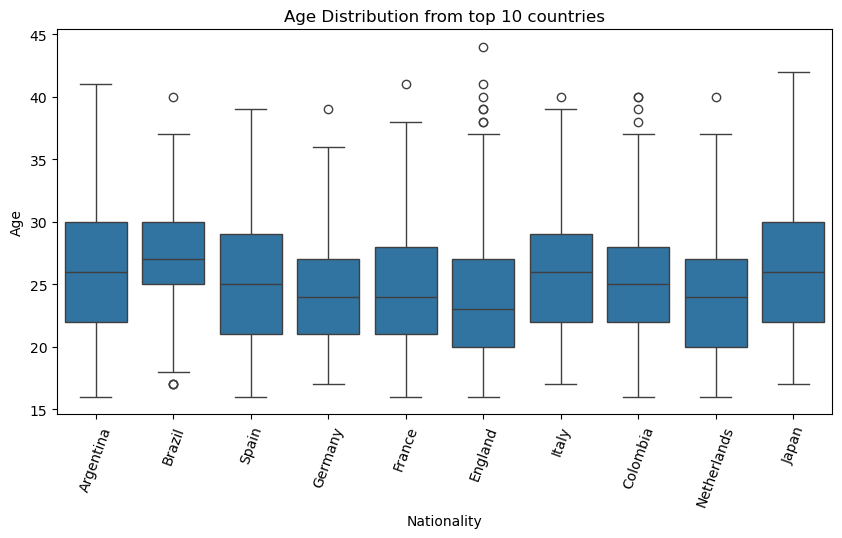

In [36]:
sns.boxplot(x='Nationality',y='Age', data=df[df['Nationality'].isin(c.index)])
plt.xticks(rotation=70)
plt.xlabel('Nationality')
plt.ylabel('Age')
plt.title('Age Distribution from top 10 countries')
plt.show()

Distribution of Overall score from top 10 countries

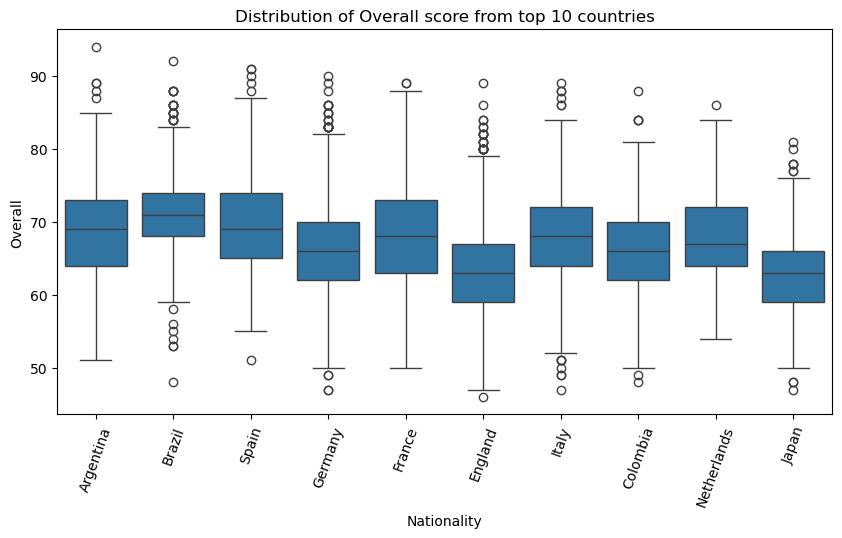

In [37]:
sns.boxplot(x='Nationality',y='Overall', data=df[df['Nationality'].isin(c.index)])
plt.xticks(rotation=70)
plt.xlabel('Nationality')
plt.ylabel('Overall')
plt.title('Distribution of Overall score from top 10 countries')
plt.show()

Top 10 best players

In [38]:
d=df.groupby('Name')['Overall'].max().sort_values(ascending=False).head(10)
d

Name
Cristiano Ronaldo    94.0
L. Messi             94.0
Neymar Jr            92.0
Sergio Ramos         91.0
L. Suárez            91.0
L. Modri?            91.0
De Gea               91.0
K. De Bruyne         91.0
E. Hazard            91.0
J. Oblak             90.0
Name: Overall, dtype: float64

Top 10 Young Players

In [39]:
b=df.groupby('Name')['Age'].min().sort_values(ascending=True).head(10)
b

Name
M. Larsen       16.0
A. Mahlonoko    16.0
G. Nugent       16.0
C. Bassett      16.0
A. Taoui        16.0
D. Adshead      16.0
K. Broda        16.0
A. Do?an        16.0
Guerrero        16.0
L. Smyth        16.0
Name: Age, dtype: float64

In [40]:
#another method
x=df.sort_values(by='Age', ascending=True).head(10)
x[['Name','Age']]

,Name,Age
18206,G. Nugent,16.0
17743,J. Olstad,16.0
13293,H. Massengo,16.0
16081,J. Italiano,16.0
18166,N. Ayéva,16.0
17712,K. Broda,16.0
17354,L. D'Arrigo,16.0
13567,Y. Verschaeren,16.0
16927,B. Nygren,16.0
18018,B. O'Gorman,16.0


In [41]:
#Assignment

What is the different work rate of the players?

In [42]:
b=df['Work Rate'].value_counts()
b

Work Rate
Medium/ Medium    9858
High/ Medium      3173
Medium/ High      1690
High/ High        1015
Medium/ Low        850
High/ Low          699
Low/ Medium        449
Low/ High          439
Low/ Low            34
Name: count, dtype: int64

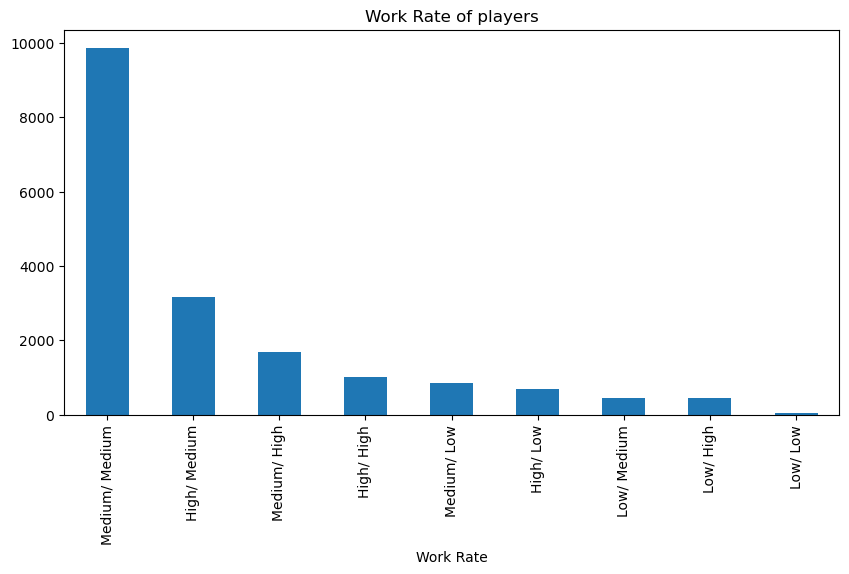

In [43]:
b.plot(kind='bar')
plt.xlabel('Work Rate')
plt.title('Work Rate of players')
plt.show()

What is the different skill moves of the players?

In [44]:
c=df['Skill Moves'].value_counts()
c

Skill Moves
2.0    8613
3.0    6600
1.0    2026
4.0     917
5.0      51
Name: count, dtype: int64

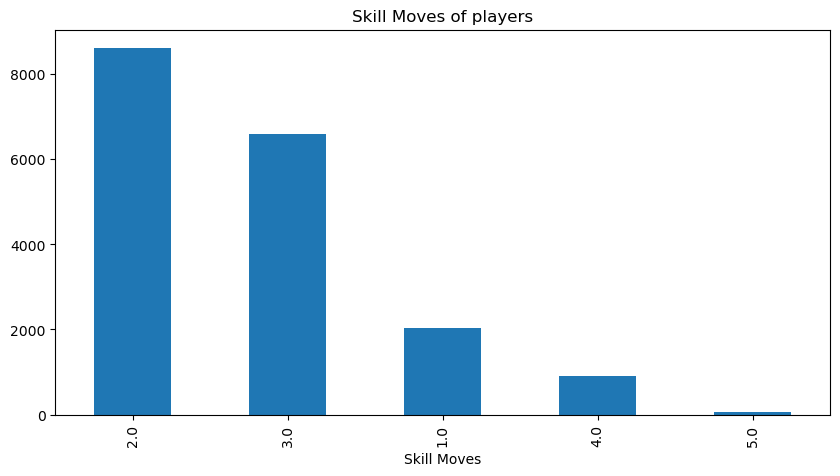

In [45]:
c.plot(kind='bar')
plt.xlabel('Skill Moves')
plt.title('Skill Moves of players')
plt.show()

How can we visualze skill moves of players segregated by preferred foot?

In [46]:
d=df.groupby(['Preferred Foot', 'Skill Moves'])['Skill Moves'].count().unstack()
d

Skill Moves,1.0,2.0,3.0,4.0,5.0
Preferred Foot,,,,,
Left,206,1954,1757,277,17
Right,1820,6659,4843,640,34


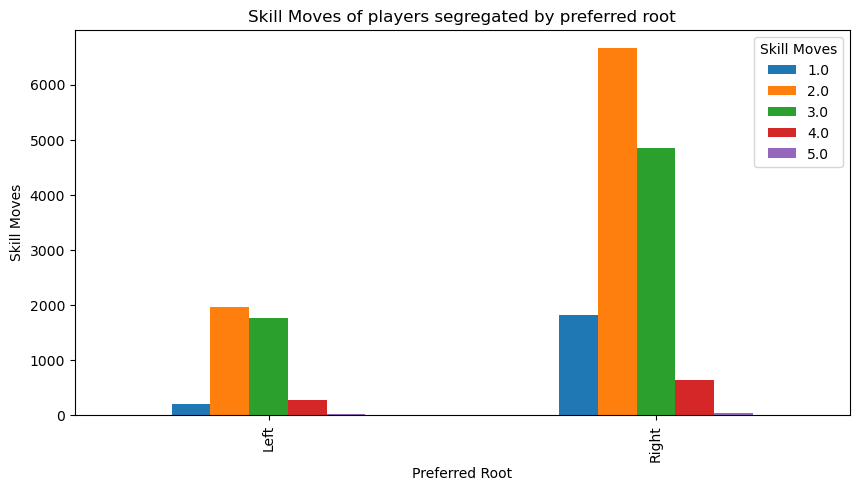

In [47]:
d.plot(kind='bar')
plt.xlabel('Preferred Root')
plt.ylabel('Skill Moves')
plt.title('Skill Moves of players segregated by preferred root')
plt.show()

How can we visualize special score of the players

In [48]:
g=df['Special'].value_counts().head(10)
g

Special
1745    47
1728    46
1628    46
1740    42
1655    42
1649    41
1691    41
1667    41
1748    40
1599    40
Name: count, dtype: int64

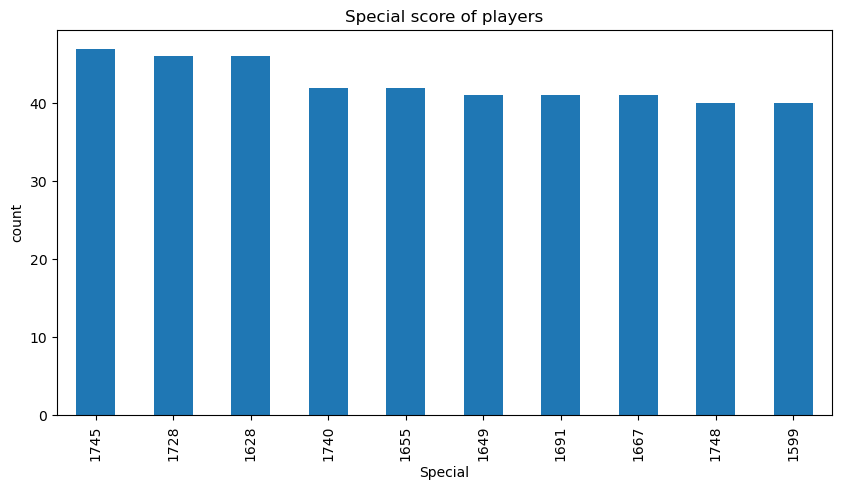

In [49]:
g.plot(kind='bar')
plt.xlabel('Special')
plt.ylabel('count')
plt.title('Special score of players')
plt.show()

How do we calculate number of countries? 

In [50]:
x=df['Nationality'].nunique()
x

164

Which countries are there in the dataset? 

In [51]:
y=df['Nationality'].value_counts()
y

Nationality
England                 1662
Germany                 1198
Spain                   1072
Argentina                937
France                   914
                        ... 
New Caledonia              1
Fiji                       1
São Tomé & Príncipe        1
United Arab Emirates       1
Botswana                   1
Name: count, Length: 164, dtype: int64

Which are top 10 countries with most number of players?

In [52]:
top_10_countries = df['Nationality'].value_counts().head(10)
top_10_countries

Nationality
England        1662
Germany        1198
Spain          1072
Argentina       937
France          914
Brazil          827
Italy           702
Colombia        618
Japan           478
Netherlands     453
Name: count, dtype: int64

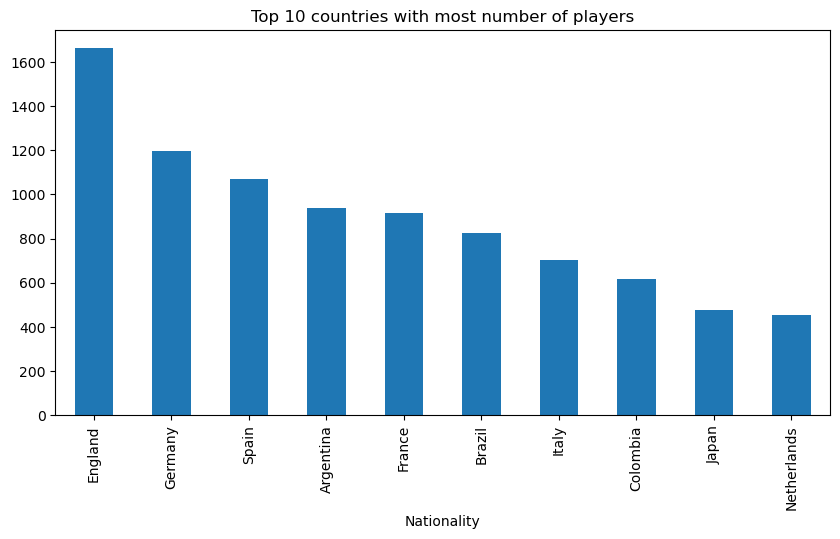

In [53]:
top_10_countries.plot(kind='bar')
plt.xlabel('Nationality')
plt.title('Top 10 countries with most number of players')
plt.show()

What is the number of players at different positions?

In [54]:
position_counts = df['Position'].value_counts()
position_counts

Position
ST     2212
GK     2025
CB     1778
CM     1394
LB     1322
RB     1291
RM     1124
LM     1095
CAM     958
CDM     948
RCB     662
LCB     648
LCM     395
RCM     391
LW      381
RW      370
RDM     248
LDM     243
LS      207
RS      203
RWB      87
LWB      78
CF       74
LAM      21
RAM      21
RF       16
LF       15
Name: count, dtype: int64

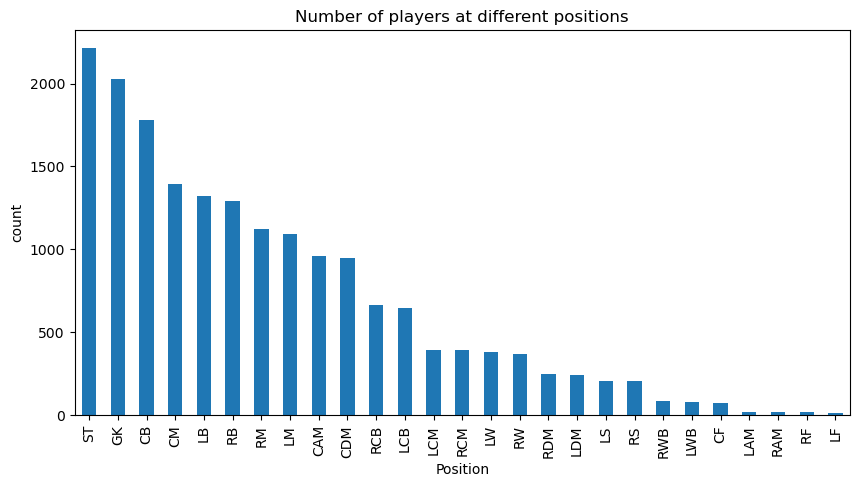

In [55]:
position_counts.plot(kind='bar')
plt.xlabel('Position')
plt.ylabel('count')
plt.title('Number of players at different positions')
plt.show()

How many clubs are there? 

In [56]:
num_clubs=df['Club'].nunique()
num_clubs

651

What are the club names? 

In [57]:
club_names = df['Club'].unique()
club_names

array(['FC Barcelona', 'Juventus', 'Paris Saint-Germain',
       'Manchester United', 'Manchester City', 'Chelsea', 'Real Madrid',
       'Atlético Madrid', 'FC Bayern München', 'Tottenham Hotspur',
       'Liverpool', 'Napoli', 'Arsenal', 'Milan', 'Inter', 'Lazio',
       'Borussia Dortmund', 'Vissel Kobe', 'Olympique Lyonnais', 'Roma',
       'Valencia CF', 'Guangzhou Evergrande Taobao FC', 'FC Porto',
       'FC Schalke 04', 'Be?ikta? JK', 'LA Galaxy', 'Sporting CP',
       'Real Betis', 'Olympique de Marseille', 'RC Celta',
       'Bayer 04 Leverkusen', 'Real Sociedad', 'Villarreal CF',
       'Sevilla FC', 'SL Benfica', 'AS Saint-Étienne', 'AS Monaco',
       'Leicester City', 'Atalanta', 'Grêmio', 'Atlético Mineiro',
       'RB Leipzig', 'Ajax', 'Dalian YiFang FC', 'Everton',
       'West Ham United', '1. FC Köln', 'TSG 1899 Hoffenheim',
       'Shanghai SIPG FC', 'OGC Nice', 'Al Nassr',
       'Wolverhampton Wanderers', 'Borussia Mönchengladbach',
       'Hertha BSC', 'SV Werder

How do we calculate number of countries?

In [58]:
num_countries=df['Nationality'].nunique()
num_countries

164

Which countries are there in the dataset?

In [59]:
countries=df['Nationality'].unique()
countries

array(['Argentina', 'Portugal', 'Brazil', 'Spain', 'Belgium', 'Croatia',
       'Uruguay', 'Slovenia', 'Poland', 'Germany', 'France', 'England',
       'Italy', 'Egypt', 'Colombia', 'Denmark', 'Gabon', 'Wales',
       'Senegal', 'Costa Rica', 'Slovakia', 'Netherlands',
       'Bosnia Herzegovina', 'Morocco', 'Serbia', 'Algeria', 'Austria',
       'Greece', 'Chile', 'Sweden', 'Korea Republic', 'Finland', 'Guinea',
       'Montenegro', 'Armenia', 'Switzerland', 'Norway', 'Czech Republic',
       'Scotland', 'Ghana', 'Central African Rep.', 'DR Congo',
       'Ivory Coast', 'Russia', 'Ukraine', 'Iceland', 'Mexico', 'Jamaica',
       'Albania', 'Venezuela', 'Japan', 'Turkey', 'Ecuador', 'Paraguay',
       'Mali', 'Nigeria', 'Cameroon', 'Dominican Republic', 'Israel',
       'Kenya', 'Hungary', 'Republic of Ireland', 'Romania',
       'United States', 'Cape Verde', 'Australia', 'Peru', 'Togo',
       'Syria', 'Zimbabwe', 'Angola', 'Burkina Faso', 'Iran', 'Estonia',
       'Tunisia', 'Equato

Who are the top 10 eldest players?

In [60]:
c=df.groupby('Name')['Age'].max().sort_values(ascending=False).head(10)
c

Name
O. Pérez         45.0
K. Pilkington    44.0
T. Warner        44.0
S. Narazaki      42.0
B. Nivet         41.0
J. Villar        41.0
M. Tyler         41.0
H. Sulaimani     41.0
C. Muñoz         41.0
S. Nakamura      40.0
Name: Age, dtype: float64

Who are the best free-kick takers?

In [61]:
best_free_kick_takers=df.groupby(['Name'])['FKAccuracy'].max().sort_values(ascending=False).head(10).reset_index()
best_free_kick_takers

,Name,FKAccuracy
0,L. Messi,94.0
1,S. Giovinco,93.0
2,M. Pjani?,92.0
3,E. Bardhi,91.0
4,H. Çalhano?lu,90.0
5,Parejo,90.0
6,M. Depay,88.0
7,S. Nakamura,88.0
8,P. Dybala,88.0
9,C. Eriksen,87.0


Who are the best penalty kick takers?

In [62]:
best_penalty_takers=df.groupby(['Name'])['Penalties'].max().sort_values(ascending=False).head(10).reset_index()
best_penalty_takers

,Name,Penalties
0,M. Balotelli,92.0
1,Fabinho,91.0
2,M. Kruse,90.0
3,D. Perotti,90.0
4,R. Jiménez,90.0
5,H. Kane,90.0
6,R. Boudebouz,90.0
7,L. Baines,90.0
8,Edinho,89.0
9,M. Reus,89.0


Who are the best players with the ball control?

In [63]:
best_ball_control=df.groupby(['Name'])['BallControl'].max().sort_values(ascending=False).head(10).reset_index()
best_ball_control

,Name,BallControl
0,L. Messi,96.0
1,Isco,95.0
2,Neymar Jr,95.0
3,Cristiano Ronaldo,94.0
4,David Silva,94.0
5,E. Hazard,94.0
6,L. Modri?,93.0
7,L. Insigne,93.0
8,Marcelo,92.0
9,P. Dybala,92.0


Who are the fastest players on the planet?

In [64]:
fastest_players = df.groupby(['Name'])['SprintSpeed'].max().sort_values(ascending=False).head(10).reset_index()
fastest_players

,Name,SprintSpeed
0,L. Sané,96.0
1,K. Mbappé,96.0
2,Adama,96.0
3,J. Damm,95.0
4,P. Aubameyang,95.0
5,I. Bebou,95.0
6,G. Bale,95.0
7,Maicon,95.0
8,D. Cole,94.0
9,E. Knudtzon,94.0


Who is the best dribbler?

In [65]:
best_dribbler=df.groupby(['Name'])['Dribbling'].max().sort_values(ascending=False).head(10).reset_index()
best_dribbler

,Name,Dribbling
0,L. Messi,97.0
1,Neymar Jr,96.0
2,E. Hazard,95.0
3,Isco,94.0
4,Y. Brahimi,93.0
5,Bernardo Silva,92.0
6,P. Dybala,92.0
7,Douglas Costa,92.0
8,Coutinho,91.0
9,R. Mahrez,91.0


Who is the best finisher?

In [66]:
best_finisher=df.groupby(['Name'])['Finishing'].max().sort_values(ascending=False).head(10).reset_index()
best_finisher

,Name,Finishing
0,L. Messi,95.0
1,H. Kane,94.0
2,Cristiano Ronaldo,94.0
3,L. Suárez,93.0
4,S. Agüero,93.0
5,G. Higuaín,92.0
6,M. Icardi,91.0
7,R. Lewandowski,91.0
8,A. Griezmann,90.0
9,M. Salah,90.0


In [67]:
df.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiv

Seggregate Indian players

In [68]:
indian_players = df[df['Nationality'] == 'India']
indian_players

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
8605,190939,S. Chhetri,33.0,https://cdn.sofifa.org/players/4/19/190939.png,India,https://cdn.sofifa.org/flags/159.png,67.0,67,AS Monaco,https://cdn.sofifa.org/flags/159.png,...,67.0,30.0,24.0,44.0,10.0,7.0,11.0,9.0,10.0,1.1M
10011,223763,S. Jhingan,24.0,https://cdn.sofifa.org/players/4/19/223763.png,India,https://cdn.sofifa.org/flags/159.png,65.0,71,AS Monaco,https://cdn.sofifa.org/flags/159.png,...,64.0,64.0,61.0,60.0,13.0,11.0,7.0,11.0,12.0,1.1M
12598,217225,J. Lalpekhlua,27.0,https://cdn.sofifa.org/players/4/19/217225.png,India,https://cdn.sofifa.org/flags/159.png,63.0,64,AS Monaco,https://cdn.sofifa.org/flags/159.png,...,47.0,28.0,31.0,29.0,13.0,11.0,10.0,10.0,11.0,1.1M
12811,225213,G. Singh Sandhu,26.0,https://cdn.sofifa.org/players/4/19/225213.png,India,https://cdn.sofifa.org/flags/159.png,63.0,68,AS Monaco,https://cdn.sofifa.org/flags/159.png,...,57.0,19.0,15.0,11.0,63.0,59.0,59.0,62.0,64.0,1.1M
13508,238205,A. Edathodika,31.0,https://cdn.sofifa.org/players/4/19/238205.png,India,https://cdn.sofifa.org/flags/159.png,62.0,62,AS Monaco,https://cdn.sofifa.org/flags/159.png,...,49.0,67.0,62.0,68.0,14.0,15.0,14.0,11.0,7.0,1.1M
14054,231461,P. Halder,25.0,https://cdn.sofifa.org/players/4/19/231461.png,India,https://cdn.sofifa.org/flags/159.png,61.0,67,AS Monaco,https://cdn.sofifa.org/flags/159.png,...,57.0,60.0,57.0,56.0,6.0,8.0,14.0,7.0,6.0,1.1M
14199,228188,P. Kotal,24.0,https://cdn.sofifa.org/players/4/19/228188.png,India,https://cdn.sofifa.org/flags/159.png,61.0,66,AS Monaco,https://cdn.sofifa.org/flags/159.png,...,55.0,63.0,58.0,60.0,10.0,7.0,11.0,12.0,8.0,1.1M
14218,208485,L. Ralte,25.0,https://cdn.sofifa.org/players/4/19/208485.png,India,https://cdn.sofifa.org/flags/159.png,61.0,62,AS Monaco,https://cdn.sofifa.org/flags/159.png,...,54.0,36.0,29.0,27.0,9.0,13.0,8.0,9.0,8.0,1.1M
14705,223764,N. Das,24.0,https://cdn.sofifa.org/players/4/19/223764.png,India,https://cdn.sofifa.org/flags/159.png,60.0,65,AS Monaco,https://cdn.sofifa.org/flags/159.png,...,57.0,62.0,67.0,60.0,14.0,9.0,12.0,10.0,11.0,1.1M
14786,233524,U. Singh,22.0,https://cdn.sofifa.org/players/4/19/233524.png,India,https://cdn.sofifa.org/flags/159.png,60.0,67,AS Monaco,https://cdn.sofifa.org/flags/159.png,...,56.0,24.0,32.0,31.0,11.0,8.0,5.0,12.0,7.0,1.1M
